In [1]:
from Bio import SeqIO
from Bio import SeqUtils
from Bio import Restriction
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
seq= SeqIO.parse("/scratch/caulobacter/data/Caulobacter_NA1000.fa", "fasta").next()
print seq
seq=seq.seq

ID: chr1
Name: chr1
Description: chr1
Number of features: 0
Seq('GAATTCTTAACGTCCTGAGACACGACAGCGACCTCTGACCGGACTCGTTCCGCG...AAT', SingleLetterAlphabet())


In [6]:
biases=np.loadtxt("data/caulo_1000000-1100000_biases.dat", skiprows=1)

In [14]:
gc=[]
window=10
for idx,pos,DL,DR,RJ in biases:
    pos=int(pos)
    gcr=SeqUtils.GC(seq[pos-window-1:pos-1])
    gcl=SeqUtils.GC(seq[pos:pos+window])
    gc.append((gcr,gcl))

In [20]:
with open("data/caulo_1000000-1100000_biases_gc.dat",'w') as fl:
    windows=[400,10]
    fl.write("id pos dangling.L dangling.R rejoined GC.R.400 GC.L.400 GC.R.10 GC.L.10\n")
    for idx,pos,DL,DR,RJ in biases:
        fl.write("%s %s %s %s %s" % (idx,pos,DL,DR,RJ))
        pos=int(pos)
        for window in windows:
            gcr=SeqUtils.GC(seq[pos-window-1:pos-1])
            gcl=SeqUtils.GC(seq[pos:pos+window])
            fl.write(" %3.1f %3.1f" % (gcr,gcl))
        fl.write('\n')
    

In [15]:
gc400[1:10],gc[1:10]

([(69.5, 73.75),
  (72.0, 71.0),
  (67.5, 70.75),
  (62.75, 69.25),
  (67.5, 69.25),
  (71.25, 71.5),
  (70.0, 69.0),
  (69.25, 64.25),
  (63.75, 66.75)],
 [(60.0, 70.0),
  (60.0, 70.0),
  (70.0, 70.0),
  (60.0, 60.0),
  (60.0, 70.0),
  (90.0, 70.0),
  (80.0, 50.0),
  (80.0, 50.0),
  (70.0, 70.0)])

In [21]:
len(seq)/10000.

404.2929

In [34]:
gc_per_bin=[]
for i in xrange(0,len(seq),10000):
    gc_per_bin.append(SeqUtils.GC(seq[i:i+10000]))
np.savetxt('gc_per_bin.dat', np.array(gc_per_bin))

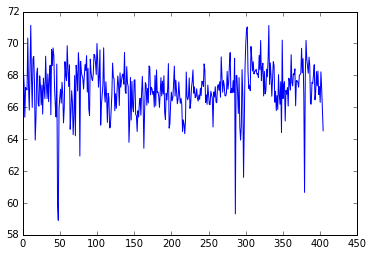

In [32]:
plt.plot(gc_dper_bin)

In [ ]:
d